# Credit risk modeling

# 1. What is credit risk?

Credit risk is a ubiquitous concept used by lenders, which can be financial institutions and individual investors, to evaluate if a borrower is likely to fulfill his financial obligations.

It measures the probability that the borrower will default on their credit obligations. Depending on the borrowers risk level or credit score, lenders can set interest payments and different terms in a contract.

Credit risk modeling involves applying statistical, mathematical, data analysis and machine learning techniques to determine the likelihood of a borrower defaulting on their financial obligations, and the potential loss that could result from such defaults.

Historical data, economic indicators, market behaviour and interest rates are commom variables used in the construction of credit risk models.



# 2. Default on credit card clients

## 2.1 Dataset

Let us construct a credit risk model based on a dataset containing information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

The dataset can be downloaded from https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset.

The content of the dataset is:

*   **ID**: ID of each client
*   **LIMIT_BAL**: Amount of given credit in NT dollars (New Taiwan dollars), includes individual and family/supplementary credit
*   **SEX**: Gender (1=male, 2=female)
*   **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
*   **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
*   **AGE**: Age in years
*   **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
*   **PAY_2**: Repayment status in August, 2005 (scale same as above)
*   **PAY_3**: Repayment status in July, 2005 (scale same as above)
*   **PAY_4**: Repayment status in June, 2005 (scale same as above)
*   **PAY_5**: Repayment status in May, 2005 (scale same as above)
*   **PAY_6**: Repayment status in April, 2005 (scale same as above)
*   **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
*   **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
*   **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
*   **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
*   **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
*   **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
*   **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
*   **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
*   **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
*   **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
*   **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
*   **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
*   **default.payment.next.month**: Default payment (1=yes, 0=no)


## 2.2 Data analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
credit_risk= pd.read_csv("/content/UCI_Credit_Card.csv")
credit_risk.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [3]:
df = credit_risk.copy()
# Since Column ID has no meaning here so, we will remove it
df.drop(["ID"], axis=1, inplace=True) #axis=1 -- column removal and inplace=True --means change in the original data

In [4]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Checking the statistics of the data.

In [5]:
print(df.describe())

            LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186

Checking for missing values

In [6]:
print(df.isnull().sum())

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


Fixing `EDUCATION` and `MARRIAGE` columns.

In [7]:
print(df.EDUCATION.value_counts())

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64


In [8]:
df['EDUCATION'] = df['EDUCATION'].replace({0:1,1:1,2:2,3:3,4:4,5:1,6:1})
print(df.EDUCATION.value_counts())

EDUCATION
2    14030
1    10930
3     4917
4      123
Name: count, dtype: int64


In [9]:
print(df.MARRIAGE.value_counts())

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


In [10]:
df['MARRIAGE'] = df['MARRIAGE'].replace({0:1,1:1,2:2,3:3})
print(df.MARRIAGE.value_counts())

MARRIAGE
2    15964
1    13713
3      323
Name: count, dtype: int64


In [11]:
df['SEX']

,SEX
0,2
1,2
2,2
3,2
4,1
...,...
29995,1
29996,1
29997,1
29998,1


Checking the target column `default.payment.next.month`

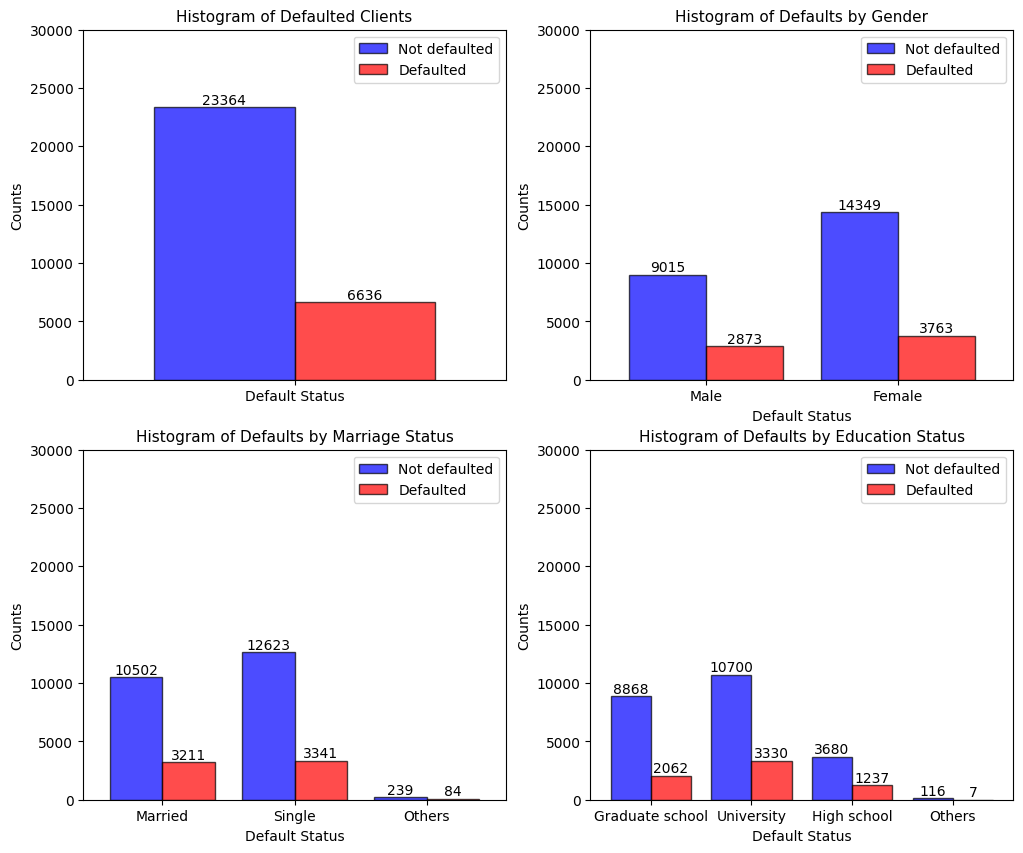

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# First plot
# ----------

# Defeaulted and Not defeaulted
bin_defaulted = df[df['default.payment.next.month'] == 1]
bin_notdefaulted = df[df['default.payment.next.month'] == 0]

# Counts
defaulted_counts = len(bin_defaulted)
notdefaulted_counts = len(bin_notdefaulted)

# Defining bin labels
x_label_defaulted = ['Default Status']
x_center_defaulted = np.array([0]) # x axis positions
bar_width = 0.4 # Width of each bar on the plot

# Plotting the grouped bar chart
bar_default = axs[0, 0].bar(x_center_defaulted - bar_width/2, notdefaulted_counts, width=bar_width, color='blue', label='Not defaulted', alpha=0.7, edgecolor='black')
bar_not_default = axs[0, 0].bar(x_center_defaulted + bar_width/2, defaulted_counts, width=bar_width, color='red', label='Defaulted', alpha=0.7, edgecolor='black')

# Adding labels and title
axs[0, 0].set_ylabel('Counts', fontsize=10)
axs[0, 0].set_title('Histogram of Defaulted Clients', fontsize=11)
axs[0, 0].set_xticks(x_center_defaulted, x_label_defaulted, fontsize=10)  # Setting x-axis labels
axs[0, 0].legend(fontsize=10)

# Set specific axis limits
axs[0, 0].set_xlim(-0.6, 0.6)  # X-axis length
axs[0, 0].set_ylim(0, len(df['default.payment.next.month']))  # Y-axis length

# Adding counts to the bars
for bar in bar_default:
    axs[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
for bar in bar_not_default:
    axs[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')

# Second plot
# -----------

# Male default
bin_gender1 = df[(df['SEX'] == 1) & (df['default.payment.next.month'] == 1)]
bin_gender2 = df[(df['SEX'] == 1) & (df['default.payment.next.month'] == 0)]
# Female default
bin_gender3 = df[(df['SEX'] == 2) & (df['default.payment.next.month'] == 1)]
bin_gender4 = df[(df['SEX'] == 2) & (df['default.payment.next.month'] == 0)]

# Defaulted counts
defaulted_gender = [len(bin_gender1), len(bin_gender3)]
# Not defaulted counts
notdefaulted_gender = [len(bin_gender2), len(bin_gender4)]

# Defining bin labels
x_label_gender = ['Male', 'Female']
x_center_gender = np.arange(len(x_label_gender)) # x axis positions for the groups
bar_width = 0.4 # Width of each bar on the plot

# Plotting the grouped bar chart
bar_gender_notdefaulted = axs[0, 1].bar(x_center_gender - bar_width/2, notdefaulted_gender, width=bar_width, color='blue', label='Not defaulted', alpha=0.7, edgecolor='black')
bar_gender_defaulted = axs[0, 1].bar(x_center_gender + bar_width/2, defaulted_gender, width=bar_width, color='red', label='Defaulted', alpha=0.7, edgecolor='black')

# Adding labels and title
axs[0, 1].set_xlabel('Default Status', fontsize=10)
axs[0, 1].set_ylabel('Counts', fontsize=10)
axs[0, 1].set_title('Histogram of Defaults by Gender', fontsize=11)
axs[0, 1].set_xticks(x_center_gender, x_label_gender)  # Setting x-axis labels
axs[0, 1].legend()

# Set specific axis limits
axs[0, 1].set_xlim(-0.6, 1.6)  # X-axis length
axs[0, 1].set_ylim(0, len(df['SEX']))  # Y-axis length

# Adding counts to the bars
for bar in bar_gender_notdefaulted:
    axs[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
for bar in bar_gender_defaulted:
    axs[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')

# Third plot
# -----------

# Married default
bin_married_defaulted = df[(df['MARRIAGE'] == 1) & (df['default.payment.next.month'] == 1)]
bin_married_notdefaulted = df[(df['MARRIAGE'] == 1) & (df['default.payment.next.month'] == 0)]
# Single default
bin_single_defaulted = df[(df['MARRIAGE'] == 2) & (df['default.payment.next.month'] == 1)]
bin_single_notdefaulted = df[(df['MARRIAGE'] == 2) & (df['default.payment.next.month'] == 0)]
# Others default
bin_others_defaulted = df[(df['MARRIAGE'] == 3) & (df['default.payment.next.month'] == 1)]
bin_others_notdefaulted = df[(df['MARRIAGE'] == 3) & (df['default.payment.next.month'] == 0)]

# Defaulted counts
defaulted_marriage = [len(bin_married_defaulted), len(bin_single_defaulted), len(bin_others_defaulted)]
# Not defaulted counts
notdefaulted_marriage = [len(bin_married_notdefaulted), len(bin_single_notdefaulted), len(bin_others_notdefaulted)]

# Defining bin labels
x_label_marriage = ['Married', 'Single', 'Others']
x_center_marriage = np.arange(len(x_label_marriage)) # x axis positions for the groups
bar_width = 0.4 # Width of each bar on the plot

# Plotting the grouped bar chart
bar_marriage_notdefaulted = axs[1, 0].bar(x_center_marriage - bar_width/2, notdefaulted_marriage, width=bar_width, color='blue', label='Not defaulted', alpha=0.7, edgecolor='black')
bar_marriage_defaulted = axs[1, 0].bar(x_center_marriage + bar_width/2, defaulted_marriage, width=bar_width, color='red', label='Defaulted', alpha=0.7, edgecolor='black')

# Adding labels and title
axs[1, 0].set_xlabel('Default Status', fontsize=10)
axs[1, 0].set_ylabel('Counts', fontsize=10)
axs[1, 0].set_title('Histogram of Defaults by Marriage Status', fontsize=11)
axs[1, 0].set_xticks(x_center_marriage, x_label_marriage)  # Setting x-axis labels
axs[1, 0].legend()

# Set specific axis limits
axs[1, 0].set_xlim(-0.6, 2.6)  # X-axis length
axs[1, 0].set_ylim(0, len(df['MARRIAGE']))  # Y-axis length

# Adding counts to the bars
for bar in bar_marriage_notdefaulted:
    axs[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
for bar in bar_marriage_defaulted:
    axs[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')

# Fourth plot
# -----------

# Graduate school default
bin_graduate_defaulted = df[(df['EDUCATION'] == 1) & (df['default.payment.next.month'] == 1)]
bin_graduate_notdefaulted = df[(df['EDUCATION'] == 1) & (df['default.payment.next.month'] == 0)]
# University default
bin_university_defaulted = df[(df['EDUCATION'] == 2) & (df['default.payment.next.month'] == 1)]
bin_university_notdefaulted = df[(df['EDUCATION'] == 2) & (df['default.payment.next.month'] == 0)]
# High school default
bin_school_defaulted = df[(df['EDUCATION'] == 3) & (df['default.payment.next.month'] == 1)]
bin_school_notdefaulted = df[(df['EDUCATION'] == 3) & (df['default.payment.next.month'] == 0)]
# Others default
bin_others_defaulted = df[(df['EDUCATION'] == 4) & (df['default.payment.next.month'] == 1)]
bin_others_notdefaulted = df[(df['EDUCATION'] == 4) & (df['default.payment.next.month'] == 0)]

# Defaulted counts
defaulted_education = [len(bin_graduate_defaulted), len(bin_university_defaulted), len(bin_school_defaulted), len(bin_others_defaulted)]
# Not defaulted counts
notdefaulted_education = [len(bin_graduate_notdefaulted), len(bin_university_notdefaulted), len(bin_school_notdefaulted), len(bin_others_notdefaulted)]

# Defining bin labels
x_label_education = ['Graduate school', 'University', 'High school', 'Others']
x_center_education = np.arange(len(x_label_education)) # x axis positions for the groups
bar_width = 0.4 # Width of each bar on the plot

# Plotting the grouped bar chart
bar_education_notdefaulted = axs[1, 1].bar(x_center_education - bar_width/2, notdefaulted_education, width=bar_width, color='blue', label='Not defaulted', alpha=0.7, edgecolor='black')
bar_education_defaulted = axs[1, 1].bar(x_center_education + bar_width/2, defaulted_education, width=bar_width, color='red', label='Defaulted', alpha=0.7, edgecolor='black')

# Adding labels and title
axs[1, 1].set_xlabel('Default Status', fontsize=10)
axs[1, 1].set_ylabel('Counts', fontsize=10)
axs[1, 1].set_title('Histogram of Defaults by Education Status', fontsize=11)
axs[1, 1].set_xticks(x_center_education, x_label_education)  # Setting x-axis labels
axs[1, 1].legend()

# Set specific axis limits
axs[1, 1].set_xlim(-0.6, 3.6)  # X-axis length
axs[1, 1].set_ylim(0, len(df['EDUCATION']))  # Y-axis length

# Adding counts to the bars
for bar in bar_education_notdefaulted:
    axs[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
for bar in bar_education_defaulted:
    axs[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')

Based on the data plotted above, married female clients appear more likely to default.

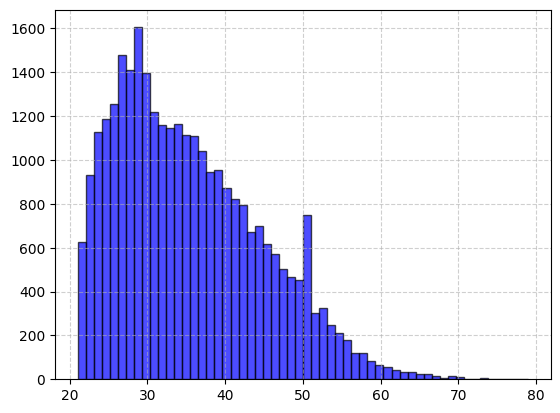

In [13]:
plt.hist(df['AGE'], bins=len(df['AGE'].value_counts()), color='blue', edgecolor='black', alpha=0.7)
plt.grid(True, linestyle='--', alpha=0.6);

In [14]:
len(df['AGE'].value_counts())

56

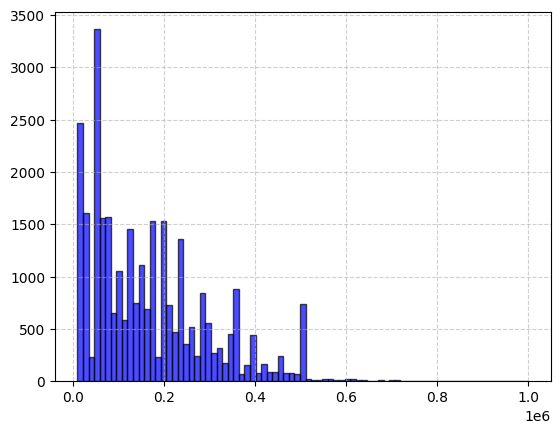

In [15]:
plt.hist(df['LIMIT_BAL'], bins=len(df['LIMIT_BAL'].value_counts()), color='blue', edgecolor='black', alpha=0.7)
plt.grid(True, linestyle='--', alpha=0.6);

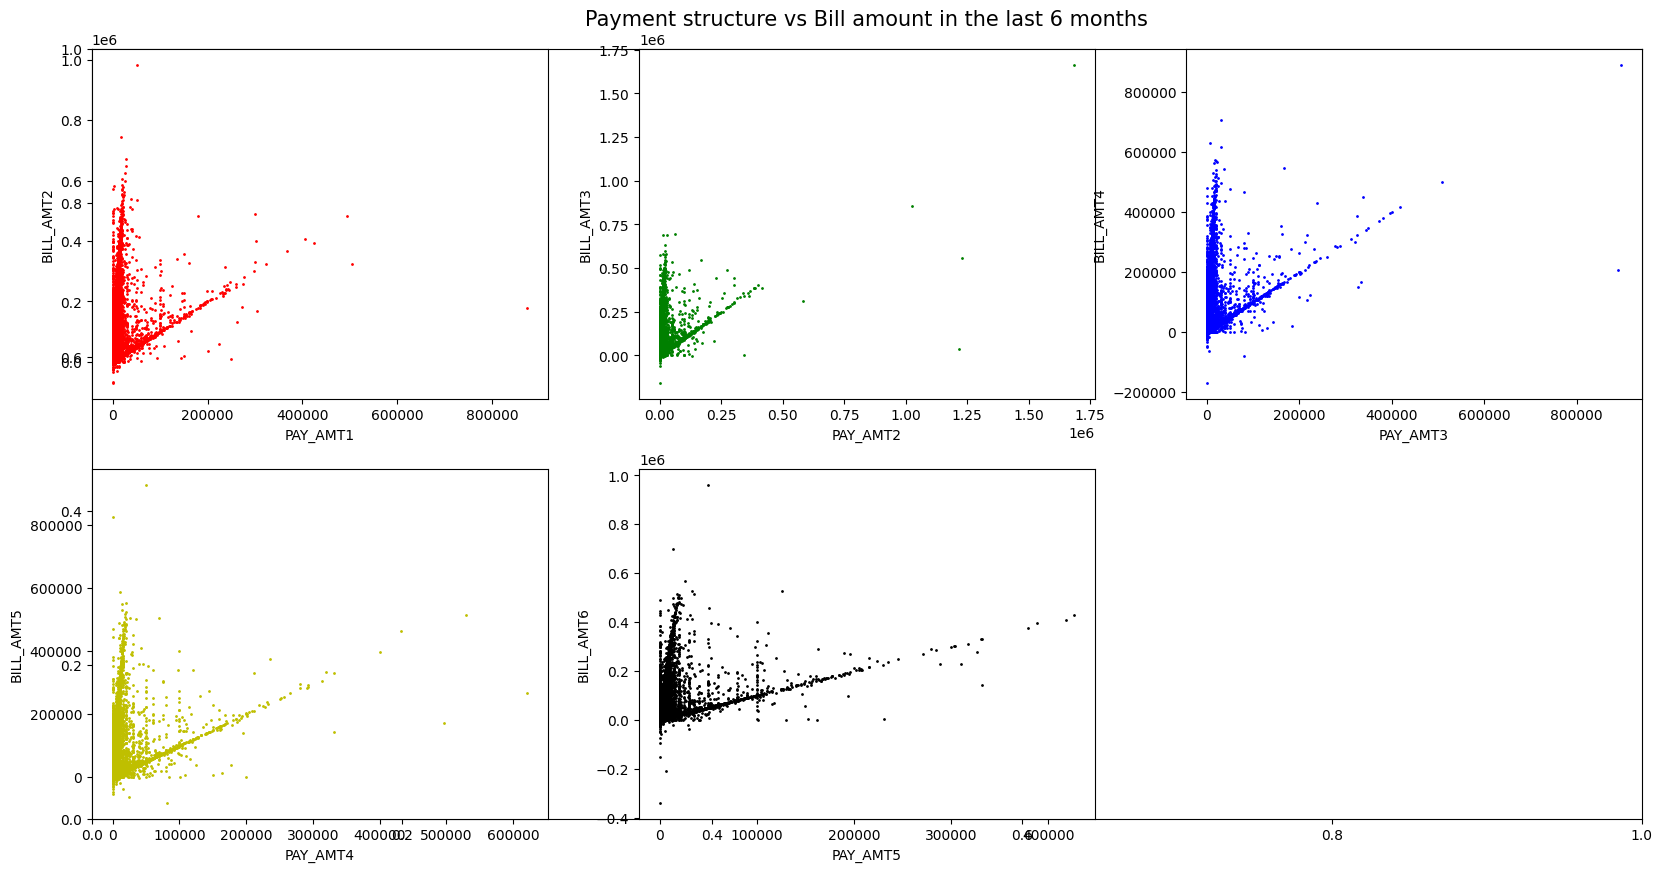

In [16]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT2, c='r', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT2')

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT3, c='g', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT3')
plt.title('Payment structure vs Bill amount in the last 6 months', fontsize=15)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT4, c='b', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT4')

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT5, c='y', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT5')

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT6, c='black', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT6')
plt.show()

# 3. Modeling

Some important definitions for this section are:

**Precision** = (True positives)/(True positives + False positives) \\
Measures model ability to avoid making false positive predictions

**Recall** = (True positives)/(True positives + False negatives) \\
Measures model ability to identify the positive cases

**Accuracy** = (True positives + True negatives)/(Total number of predictions) \\ Indicates the proportion of correct predictions out of all predictions

There is often an inverse relationship between precision and recall. As you increase one, the other may decrease.

**F1 score** = 2 * (Precision * Recall)/(Precision + Recall) \\
Ranges between 0 and 1, wih higher values indication better model performance. WHen precision and recall are imbalanced, the F1 score is the more informative measure.

**Confusion Matrix:**
\begin{align}
\text{Confusion Matrix} & = \begin{pmatrix} \text{True positive} & \text{False negative (Type II error)} \\ \text{False positive (Type I error)} & \text{True negative} \end{pmatrix}\,.
\end{align}

## 3.1 SMOTE

Based on the plot above, two distinct trends emerge: one where clients pay the full due amount and another where clients pay less than the billed amount.

However, there are more data for clients that have not defaulted than for clients who defaulted. When one class has more data than the other, it is called class imbalance.

In order to overcome class imbalance we will make use of SMOTE (Synthetic Minority Oversampling Technique), which consists in an oversampling technique designed to generate synthetic instances for the minority class. In our case, the minority class is the defaulted clients.

SMOTE can be implemented from the mblearn.over_sampling library.

In [17]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [18]:
# Independnet features
X = df.drop(['default.payment.next.month'], axis=1)
# Dependent feature
y = df['default.payment.next.month']

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
from imblearn.over_sampling import SMOTE
from collections import Counter

# Summarize class distribution
print("Before oversampling: ",Counter(y_train))
# Define oversampling strategy
SMOTE = SMOTE()
# Fit and apply the transform
X_train, y_train = SMOTE.fit_resample(X_train,y_train)
# Summarize class distribution
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 18677, 1: 5323})
After oversampling:  Counter({0: 18677, 1: 18677})


## 3.1 Logistic Regression

Logistic regression consists in a method used for binary classification tasks, so that one can predict where an input belongs to one of two classes.

It is interpretable, as one can examine each of the coefficients to understand the impact of each feature on the prediction.

One of its drawbacks is that it assumes a linear relationship between features, so that it may fail in certain real world scenarios.

The logistic regression method can be summarized by the following steps:

1. Creates a linear combination of the input features $x_n$ using weights ($\beta_n$)
\begin{align}
{\rm Logit} & = \beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n \,.
\end{align}

2. Converts the Logit function to probabilities by building the logistic function (e. g., sigmoid).

3. Training the model by finding the optimal values for the parameters $\beta_n$ that best fit the data.

4. Use the model to make predictions after defining a decision boundary, i.e., the threshold that separates the two classes in feature space (a common threshold vale is 0.5).

The accuracy of the logistic regression model is: 0.6843333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.69      0.77      4687
           1       0.37      0.66      0.48      1313

    accuracy                           0.68      6000
   macro avg       0.63      0.67      0.63      6000
weighted avg       0.77      0.68      0.71      6000



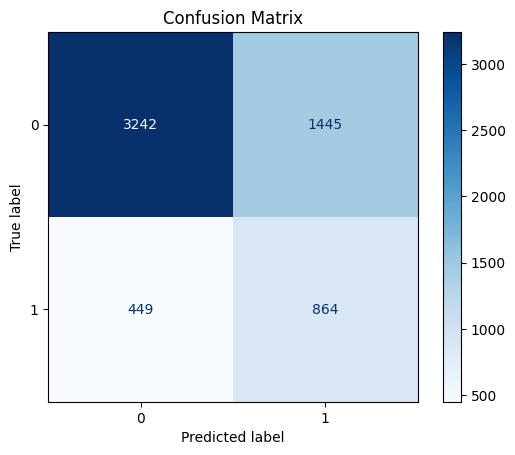

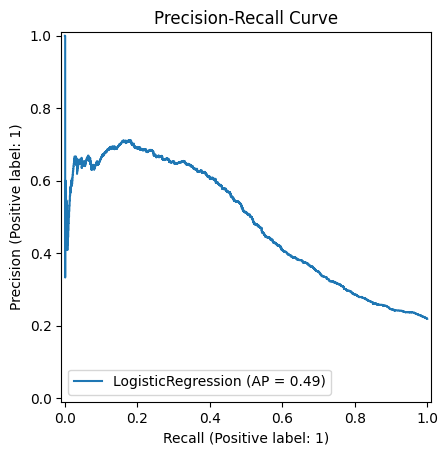

In [20]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    PrecisionRecallDisplay,
)

# Logistic regression model
logit = LogisticRegression()
logit.fit(X_train, y_train)

# Predicting the model
pred_logit = logit.predict(X_test)

# Evaluate accuracy and classification report
print("The accuracy of the logistic regression model is:", accuracy_score(y_test, pred_logit))
print("\nClassification Report:\n", classification_report(y_test, pred_logit))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(logit, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Plot precision-recall curve
PrecisionRecallDisplay.from_estimator(logit, X_test, y_test)
plt.title("Precision-Recall Curve")
plt.show()


## 3.2 Random Forest Classifier

The random forest classifier is a machine learning algorithm that uses multiple decision trees to classify data into different categories and belongs to the ensemble learning family, which means that it combines the output of several models (decision trees) to make more robust and stable predictions.

Decision trees are binary are binar tree structures that recursively split the data into subsets based on the values of input features.

In [21]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)  # Set random_state for reproducibility

# Fitting the model
rf.fit(X_train, y_train)

# Predicting the model
pred_rf = rf.predict(X_test)

# Evaluate accuracy and classification report
print("The accuracy of the Random Forest Classifier is:", accuracy_score(y_test, pred_rf))
print("\nClassification Report:\n", classification_report(y_test, pred_rf))

The accuracy of the Random Forest Classifier is: 0.7926666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      4687
           1       0.53      0.47      0.50      1313

    accuracy                           0.79      6000
   macro avg       0.69      0.68      0.68      6000
weighted avg       0.78      0.79      0.79      6000



The accuracy and F1 score of the Random Forest Classifier turned out to be superior than the ones in the Logistic Regression model.